## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [27]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

bin img  (60000, 28, 28) dot values 0 33.318421449829934 255
label 5 training_labels (60000,) 0 9


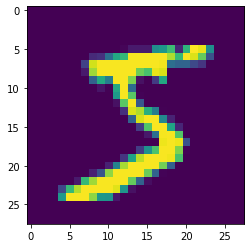

In [28]:
    import matplotlib.pyplot as plt
    import numpy as np
    
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels),(test_images, test_labels) = mnist.load_data(path=path)
    
    print('bin img ', training_images.shape, 'dot values', np.min(training_images), np.mean(training_images), np.max(training_images))
    print('label', training_labels[0], 'training_labels', training_labels.shape, np.min(training_labels), np.max(training_labels))
    plt.imshow(training_images[0])
    plt.show()


In [33]:
if(tf.version.VERSION >'2.0'):
    accuracy = 'accuracy'
else: # v1.x
    accuracy = 'acc'

# YOUR CODE SHOULD START HERE
class earlyStop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # if(logs.get('acc')>=0.99 and logs.get('val_acc') >= 0.99):
    if(logs.get(accuracy) >= 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
# YOUR CODE SHOULD START HERE
(x_train, x_test) = ((x_train - 33.32) /255.0, (x_test - 33.32) /255.0)
# YOUR CODE SHOULD END HERE

# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.
    global model
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(600, activation=tf.nn.relu),
      tf.keras.layers.Dense(30, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    global history
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_train, y_train, epochs=10, callbacks=[earlyStop()], shuffle=True, batch_size=600,
        validation_split=0.1
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    # return history.epoch, history.history['acc'][-1]
    return history.epoch, history.history[accuracy][-1]

In [34]:
train_mnist()
model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 24us/sample - loss: 0.4732 - accuracy: 0.8613 - val_loss: 0.1698 - val_accuracy: 0.9557
Epoch 2/10
54000/54000 [==============================] - 1s 16us/sample - loss: 0.1790 - accuracy: 0.9484 - val_loss: 0.1163 - val_accuracy: 0.9685
Epoch 3/10
54000/54000 [==============================] - 1s 16us/sample - loss: 0.1234 - accuracy: 0.9646 - val_loss: 0.0925 - val_accuracy: 0.9767
Epoch 4/10
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0917 - accuracy: 0.9738 - val_loss: 0.0821 - val_accuracy: 0.9767
Epoch 5/10
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0724 - accuracy: 0.9795 - val_loss: 0.0766 - val_accuracy: 0.9795
Epoch 6/10
54000/54000 [==============================] - 1s 16us/sample - loss: 0.0571 - accuracy: 0.9841 - val_loss: 0.0721 - val_accuracy: 0.9805
Epoch 7/10
54000/54000 [==============================] -

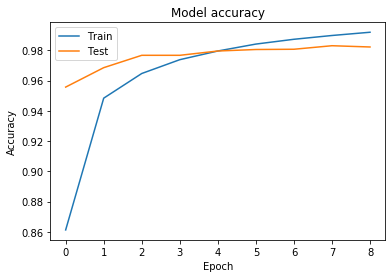

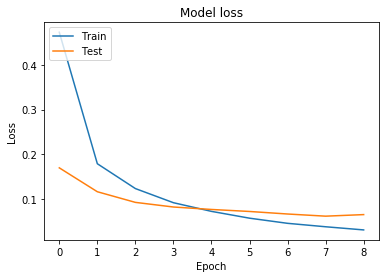

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0353 - accuracy: 0.9791


[0.06968312733990606, 0.9791]